In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
import locale


In [67]:
paris_l = pd.read_csv("/Users/LPA/Desktop/PROJET DATABIRD/BASE DE DONNÉE PARIS/paris_listings.csv")
paris_l.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20230313171257,2023-03-14,city scrape,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.54,7510402838018,f,1,1,0,0,1.99
1,7397,https://www.airbnb.com/rooms/7397,20230313171257,2023-03-29,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.88,4.93,4.73,7510400829623,f,2,2,0,0,2.26


In [68]:
print('\nRows : ',paris_l.shape[0])
print('\nColumns :', paris_l.shape[1])
print('\nColumns:',paris_l.columns.to_list())
print(' \nUnique:\n',paris_l.nunique())


Rows :  56726

Columns : 75

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availabi

In [69]:
paris_l_clean = paris_l[['id', 'host_id','host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_scores_rating',
       'calculated_host_listings_count', 'availability_365']]
paris_l_clean

,id,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,calculated_host_listings_count,availability_365
0,5396,7903,Borzou,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,$124.00,15,332,2023-02-18,1.99,4.54,1,184
1,7397,2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,$130.00,10,329,2023-03-15,2.26,4.73,2,171
2,7964,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,$140.00,4,6,2015-09-14,0.04,4.80,1,48
3,9359,28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,$75.00,180,0,NaN,NaN,NaN,1,264
4,9952,33534,Elisabeth,"Paris, Ile-de-France, France",Popincourt,48.863730,2.370930,Entire home/apt,$160.00,4,43,2022-10-21,0.35,4.91,1,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56721,843263965560420069,156775524,Merveil,NaN,Louvre,48.866576,2.334990,Entire home/apt,$640.00,1,0,NaN,NaN,NaN,66,359
56722,843264086459366855,156775524,Merveil,NaN,Louvre,48.864663,2.334365,Entire home/apt,$538.00,1,0,NaN,NaN,NaN,66,340
56723,843268818718844445,1112584,IntoParis,NaN,Hôtel-de-Ville,48.853447,2.364120,Entire home/apt,$600.00,5,0,NaN,NaN,NaN,92,59
56724,843270207995447181,472186398,Juliana,"Paris, Île-de-France, France",Bourse,48.869729,2.349743,Entire home/apt,$181.00,1,0,NaN,NaN,NaN,12,236


In [70]:
paris_l_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56726 entries, 0 to 56725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              56726 non-null  int64  
 1   host_id                         56726 non-null  int64  
 2   host_name                       56708 non-null  object 
 3   neighbourhood                   32447 non-null  object 
 4   neighbourhood_cleansed          56726 non-null  object 
 5   latitude                        56726 non-null  float64
 6   longitude                       56726 non-null  float64
 7   room_type                       56726 non-null  object 
 8   price                           56726 non-null  object 
 9   minimum_nights                  56726 non-null  int64  
 10  number_of_reviews               56726 non-null  int64  
 11  last_review                     45631 non-null  object 
 12  reviews_per_month               

In [48]:
paris_l_clean = paris_l_clean.replace(np.nan, 0)
paris_l_clean ## Remplacer les NAN par des 0

,id,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,calculated_host_listings_count,availability_365
0,5396,7903,Borzou,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,$124.00,15,332,2023-02-18,1.99,4.54,1,184
1,7397,2626,Franck,0,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,$130.00,10,329,2023-03-15,2.26,4.73,2,171
2,7964,22155,Anaïs,0,Opéra,48.874170,2.342450,Entire home/apt,$140.00,4,6,2015-09-14,0.04,4.80,1,48
3,9359,28422,Bernadette,0,Louvre,48.860060,2.348630,Entire home/apt,$75.00,180,0,0,0.00,0.00,1,264
4,9952,33534,Elisabeth,"Paris, Ile-de-France, France",Popincourt,48.863730,2.370930,Entire home/apt,$160.00,4,43,2022-10-21,0.35,4.91,1,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56721,843263965560420069,156775524,Merveil,0,Louvre,48.866576,2.334990,Entire home/apt,$640.00,1,0,0,0.00,0.00,66,359
56722,843264086459366855,156775524,Merveil,0,Louvre,48.864663,2.334365,Entire home/apt,$538.00,1,0,0,0.00,0.00,66,340
56723,843268818718844445,1112584,IntoParis,0,Hôtel-de-Ville,48.853447,2.364120,Entire home/apt,$600.00,5,0,0,0.00,0.00,92,59
56724,843270207995447181,472186398,Juliana,"Paris, Île-de-France, France",Bourse,48.869729,2.349743,Entire home/apt,$181.00,1,0,0,0.00,0.00,12,236


In [71]:
paris_l_clean.price.isna().sum()

0

In [72]:
paris_l_clean['price'].describe()

count       56726
unique       1165
top       $100.00
freq         1951
Name: price, dtype: object

In [73]:
paris_l_clean['price'] = paris_l_clean['price'].str.replace(',', '')
paris_l_clean['price'] = paris_l_clean['price'].str.replace('$', '')
paris_l_clean['price']
## retirer les dollars du prix

/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_42265/1098670715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_l_clean['price'] = paris_l_clean['price'].str.replace(',', '')
/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_42265/1098670715.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  paris_l_clean['price'] = paris_l_clean['price'].str.replace('$', '')
/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_42265/1098670715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

0        124.00
1        130.00
2        140.00
3         75.00
4        160.00
          ...  
56721    640.00
56722    538.00
56723    600.00
56724    181.00
56725    300.00
Name: price, Length: 56726, dtype: object

In [74]:
paris_l_clean['price'] = paris_l_clean['price'].astype(float)
## convertion du type du price de object en float64

/var/folders/vy/9vppt5zx3k3_0z_sbxs9zb6w0000gp/T/ipykernel_42265/3056532754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_l_clean['price'] = paris_l_clean['price'].astype(float)


In [75]:
paris_l_clean['price'].describe()

count    56726.000000
mean       171.991080
std        598.279546
min          0.000000
25%         73.000000
50%        110.000000
75%        180.000000
max      93000.000000
Name: price, dtype: float64

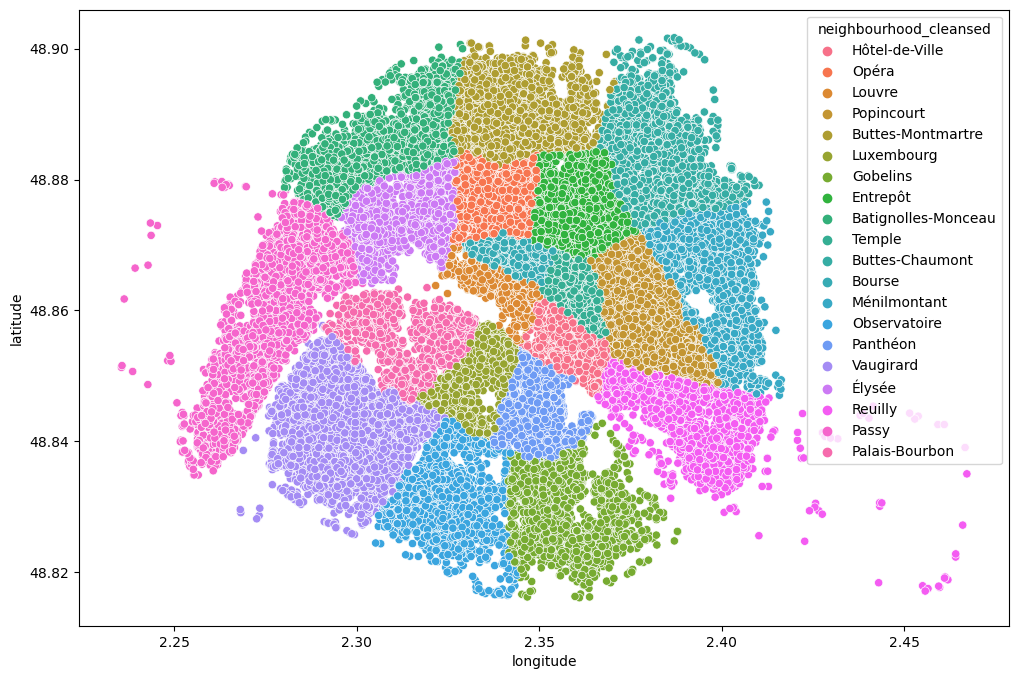

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=paris_l_clean.longitude,y=paris_l_clean.latitude,hue=paris_l_clean.neighbourhood_cleansed)
plt.show() ## Nuage de points pour afficher les quartier en fonction de la latitude et de la longitude

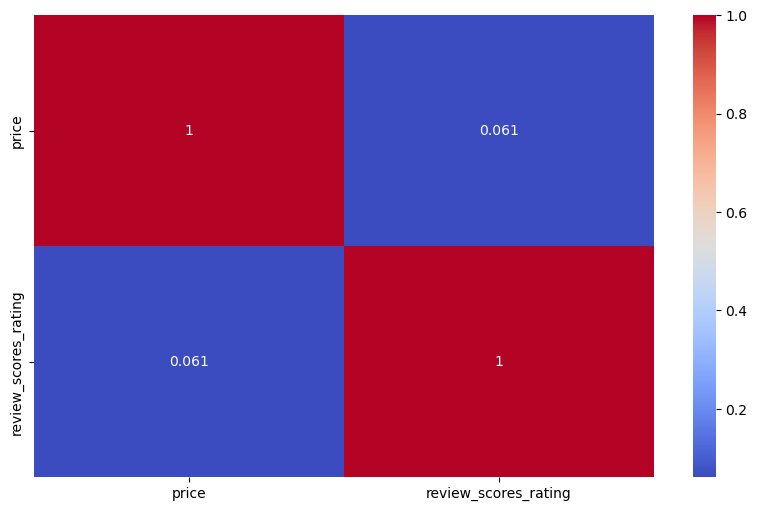

In [77]:
cols = ['price', 'review_scores_rating']
corr = paris_l_clean[cols].corr(method='kendall')

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
## Obtenir la corrélation entre différentes variables

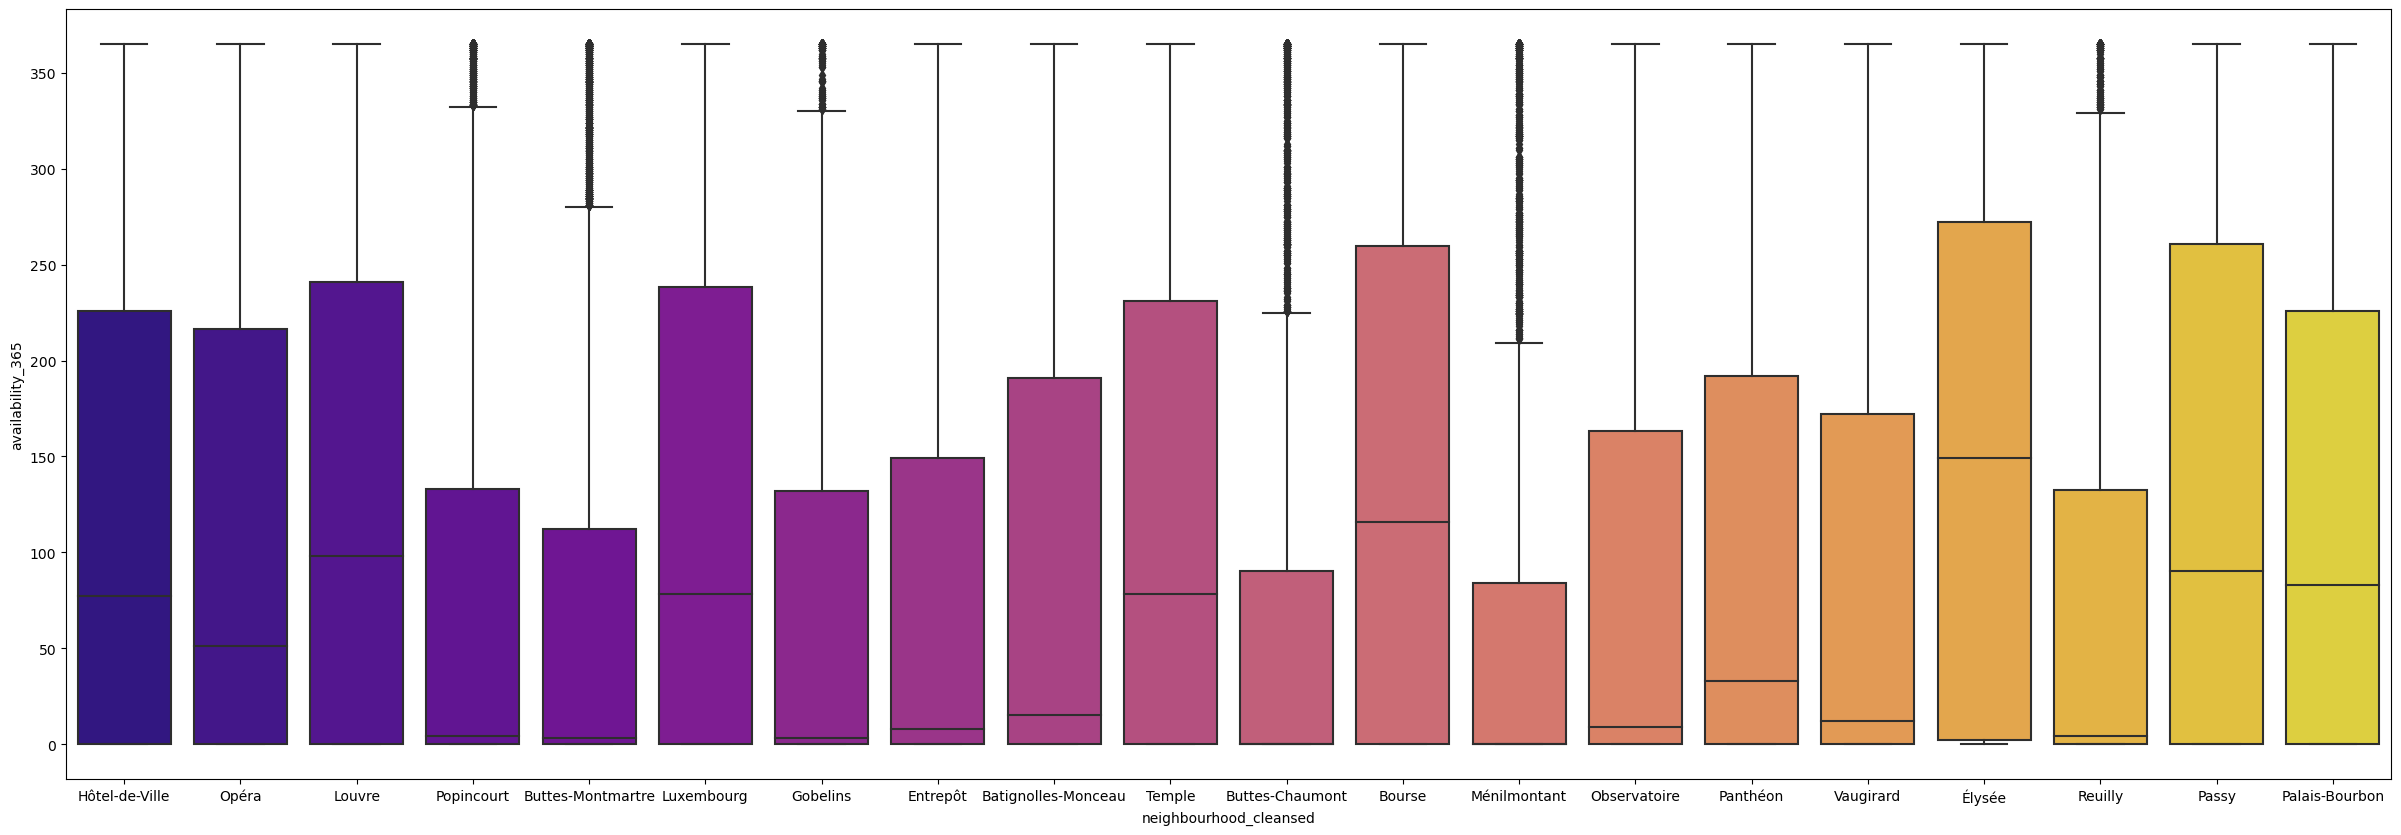

In [61]:
plt.figure(figsize=(30,10))
ax = sns.boxplot(data=paris_l_clean, x='neighbourhood_cleansed',y='availability_365',palette='plasma')
## Relation entre les quartiers et la disponibilité des logements

In [26]:
print('Unique value for room_type are :',paris_l_clean.room_type.unique())
print('Unique value for neighbourhood_group are :',paris_l_clean.neighbourhood_cleansed.unique())
## la liste des types de chambre et des quartiern nous avons 4 types de logement et 20 quartiers

Unique value for room_type are : ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Unique value for neighbourhood_group are : ['Hôtel-de-Ville' 'Opéra' 'Louvre' 'Popincourt' 'Buttes-Montmartre'
 'Luxembourg' 'Gobelins' 'Entrepôt' 'Batignolles-Monceau' 'Temple'
 'Buttes-Chaumont' 'Bourse' 'Ménilmontant' 'Observatoire' 'Panthéon'
 'Vaugirard' 'Élysée' 'Reuilly' 'Passy' 'Palais-Bourbon']


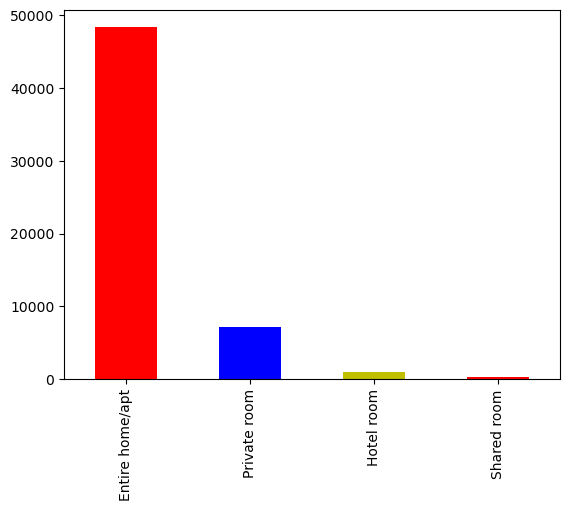

In [27]:
paris_l_clean['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()
## répartition du type de chambre en regroupant les données. 
## Les appartements privés sont supérieures à celles des chambres partagées. 

In [28]:
apt = paris_l_clean[paris_l_clean['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_cleansed']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)
## top 10 des appartements

KeyError: 'host_id'

In [ ]:
sonder_data = paris_l_clean[paris_l_clean['host_name']=='Les Patios Du Marais']
sonder_data_by = sonder_data[['host_id','host_name','neighbourhood','neighbourhood_cleansed','latitude','longitude']]
sonder_data_by.head(5)
## les 5 premières annonces du premier loueur Les Patios du Marais on peut voir qu'ils sont quasiment localisés au même endroit

,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude
17613,147018685,Les Patios Du Marais,0,Temple,48.86390,2.35672
17620,147018685,Les Patios Du Marais,0,Temple,48.86389,2.35672
17633,147018685,Les Patios Du Marais,0,Temple,48.86393,2.35671
17635,147018685,Les Patios Du Marais,0,Temple,48.86389,2.35672
17716,147018685,Les Patios Du Marais,0,Temple,48.86391,2.35670


In [ ]:
private = paris_l_clean[paris_l_clean['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)
## top 10 des chambres privées

,host_id,host_name,neighbourhood,private
5330,460047164,Alexandre,0,90
2820,45788344,LookBook,0,35
3898,117238503,Sophie,"Paris, Île-de-France, France",32
5150,397076625,Machefert,"Paris, Île-de-France, France",25
2845,46443228,Xavier,"Paris, Île-de-France, France",24
5036,362016220,Sonder (Paris),"Paris, Île-de-France, France",21
3851,110402903,Isabelle & Thierry,"Paris, Île-de-France, France",19
3736,97884072,Hotel SUNNY,"Paris-5E-Arrondissement, Île-de-France, France",15
4705,268319255,Karine,"Paris, Île-de-France, France",14
5426,486460832,David,0,14


In [ ]:
private_data = paris_l_clean[paris_l_clean['host_name']=='Alexandre']
private_data_by = private_data[['host_id','host_name','neighbourhood','neighbourhood_cleansed','latitude','longitude']]
private_data_by.head()
## les 5 premières location de chambre privée du loueur Alexandre

,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude
296,2460730,Alexandre,0,Ménilmontant,48.87218,2.39045
562,2891527,Alexandre,"Paris, Île-de-France, France",Batignolles-Monceau,48.89104,2.32294
677,1184670,Alexandre,"Paris, Île-de-France, France",Entrepôt,48.88189,2.36393
871,4829101,Alexandre,0,Reuilly,48.84737,2.38684
913,4960548,Alexandre,"Paris, Île-de-France, France",Ménilmontant,48.85292,2.39732


In [ ]:
private = paris_l_clean[paris_l_clean['room_type']=='Shared room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='shared').sort_values(by=['shared'],ascending=False)
list_private.head(10)
#### top 10 des chambres partagées

,host_id,host_name,neighbourhood,shared
191,221816312,Tina,"Paris, Île-de-France, France",10
102,50537853,Ruth,"Paris, Île-de-France, France",8
202,264290202,Aishun,"Paris, Île-de-France, France",7
195,237151944,St Christophers Inn Paris Canal,0,6
216,373224575,Anne,"Paris, Île-de-France, France",6
207,315206797,Les Piaules,"Paris, Île-de-France, France",5
218,400104205,The People,0,4
226,479753526,찬화,0,4
206,309707704,The People Paris Bercy,"Paris, Île-de-France, France",4
212,365421815,Jo&Joe Paris - Nation,"Paris, Île-de-France, France",3


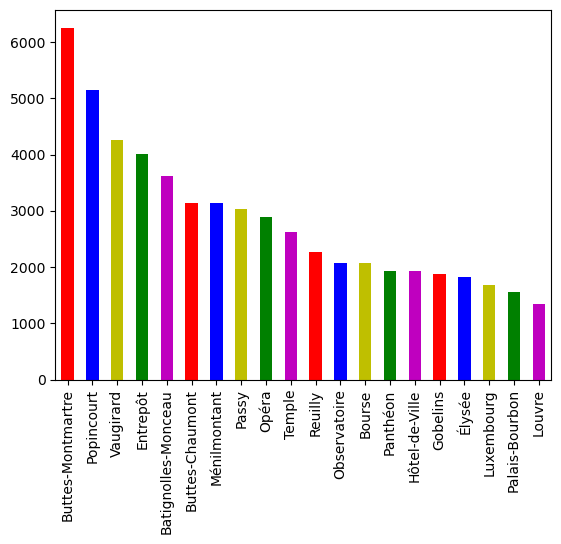

In [ ]:
paris_l_clean['neighbourhood_cleansed'].value_counts().plot(kind='bar',color=['r','b','y','g','m'])
plt.show()
## Exploration par quartier

In [ ]:
private = paris_l_clean[paris_l_clean['neighbourhood_cleansed']=='Buttes-Montmartre']
list_private = private.groupby(['host_id','host_name','neighbourhood','neighbourhood_cleansed']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)
list_private.head(10)
## Top 10 des logements dans le quartier Buttes-Montmartre

,host_id,host_name,neighbourhood,neighbourhood_cleansed,count
730,6053288,Anna,"Paris, Île-de-France, France",Buttes-Montmartre,26
3477,50502817,Pierre De WeHost,"Paris, Île-de-France, France",Buttes-Montmartre,24
4282,117297906,Michel Et Amina,"Paris, Île-de-France, France",Buttes-Montmartre,20
5356,440295601,Gaelle,0,Buttes-Montmartre,20
5444,458533553,Joffrey,"Paris, Île-de-France, France",Buttes-Montmartre,14
1224,10248664,Charles,"Paris, Île-de-France, France",Buttes-Montmartre,13
4281,117297906,Michel Et Amina,0,Buttes-Montmartre,12
4930,274685500,Claude,0,Buttes-Montmartre,10
4825,237073244,Brothers Care,"Paris, Île-de-France, France",Buttes-Montmartre,10
133,1466887,Milena,"Paris, Île-de-France, France",Buttes-Montmartre,9


<AxesSubplot:xlabel='price'>

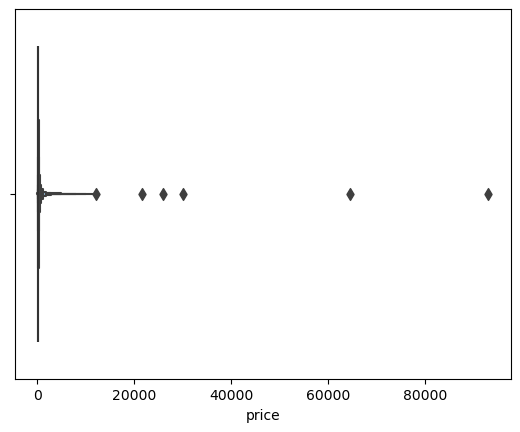

In [344]:
figsize=(12,8)
sns.boxenplot(x='price',data=paris_l_clean)
## boîte à moustaches pour comprendre comment les données sont réparties pour les fourchettes élevées pour le prix

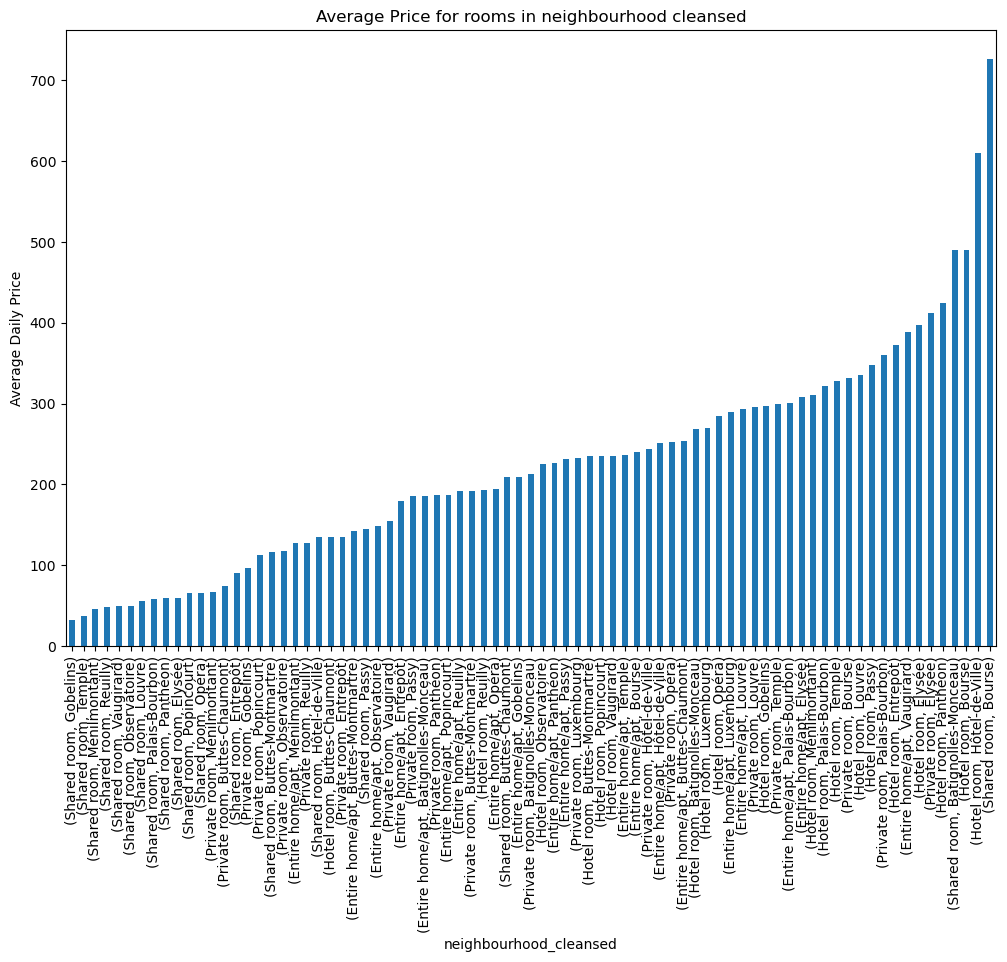

List of Average Price per night based on the neighbourhood cleansed


price
room_type       neighbourhood_cleansed            
Entire home/apt Batignolles-Monceau     185.708934
                Gobelins                209.316327
                Palais-Bourbon          300.776316
                Opéra                   194.590028
                Reuilly                 192.056911
...                                            ...
Shared room     Entrepôt                 89.857143
                Buttes-Montmartre       116.300000
                Hôtel-de-Ville          134.500000
                Panthéon                 59.444444
                Bourse                  725.750000

[79 rows x 1 columns]

In [310]:
paris_l_clean.head()
plt.figure(figsize=(12,8))
paris_l_clean = paris_l_clean[paris_l_clean['minimum_nights']==1]
paris_l_clean1 = paris_l_clean.groupby(['room_type','neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True)
paris_l_clean1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood cleansed')
plt.ylabel('Average Daily Price')
plt.xlabel('neighbourhood_cleansed')
plt.show()
print('List of Average Price per night based on the neighbourhood cleansed')
pd.DataFrame(paris_l_clean1).sort_values(by='room_type')
##Loyer moyen par chambre pour la localité
##La chambre partagée à Gobelin est le séjour le moins cher par nuit, tandis que la location d'un appartement entier à Vaugirard par nuit est la plus chère.
##Le prix moyen d'une chambre partagée est également considérablement cher à Bourse
##de même que la chambre privée à Elysée est plus chère que les autres chambres privées de Paris. 

most expensive locality per neighbourhood in Airbnb listing are :


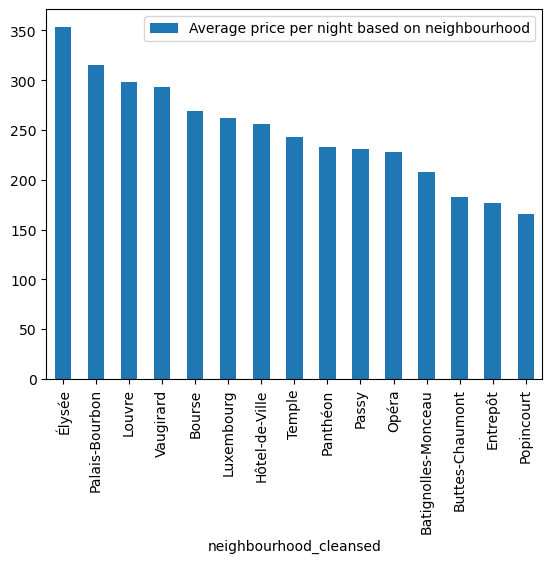

,Average price per night based on neighbourhood
neighbourhood_cleansed,
Élysée,353.685558
Palais-Bourbon,315.192593
Louvre,298.013928
Vaugirard,292.870504
Bourse,269.194056
Luxembourg,262.056911
Hôtel-de-Ville,256.052632
Temple,242.513135
Panthéon,232.781038


In [235]:
print('most expensive locality per neighbourhood in Airbnb listing are :')
paris_l_clean = paris_l_clean.dropna(subset=['price']).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", 'price']].agg("mean").sort_values(by='price',
                                                                                                                                    ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

paris_l_clean.plot(kind='bar')
plt.show()
pd.DataFrame(paris_l_clean)
## Quartier les plus cher
## l'Élysée est le plus cher en termes de quartier. Alors que la localité principale de Popincourt est la moins chère des quartier les plus cher.

Least expensive neighbourhood according to Airbnb listing are


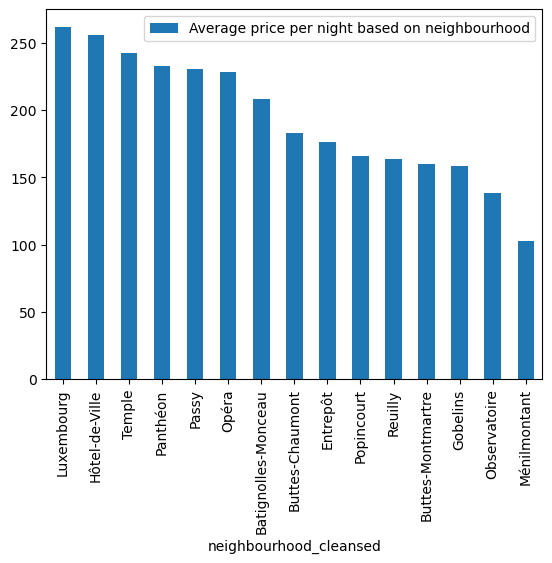

,Average price per night based on neighbourhood
neighbourhood_cleansed,
Luxembourg,262.056911
Hôtel-de-Ville,256.052632
Temple,242.513135
Panthéon,232.781038
Passy,230.768362
Opéra,228.381071
Batignolles-Monceau,208.057607
Buttes-Chaumont,183.174664
Entrepôt,176.437318


In [260]:
print('Least expensive neighbourhood according to Airbnb listing are')
paris_l_clean = paris_l_clean.dropna(subset=['price']).groupby("neighbourhood_cleansed")[["neighbourhood_cleansed", 'price']].agg("mean").sort_values(by='price',
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).tail(15)

paris_l_clean.plot(kind='bar')
plt.show()
pd.DataFrame(paris_l_clean)
## ## Quartier les moins cher

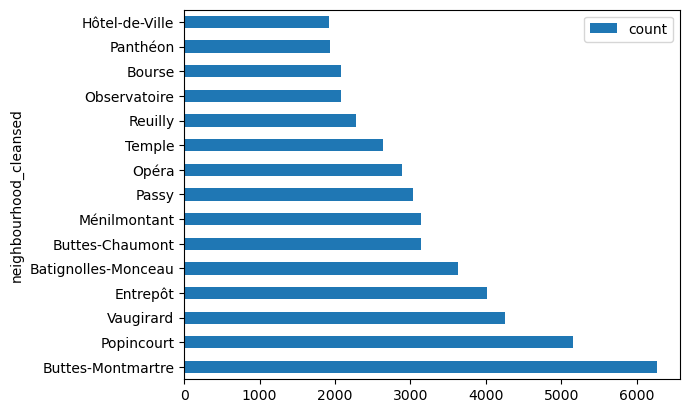

,count
neighbourhood_cleansed,
Buttes-Montmartre,6262
Popincourt,5149
Vaugirard,4258
Entrepôt,4019
Batignolles-Monceau,3625
Buttes-Chaumont,3139
Ménilmontant,3139
Passy,3028
Opéra,2884


In [285]:
paris_l_clean = paris_l_clean.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

paris_l_clean.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(paris_l_clean.head(15))
##La plupart des localités répertoriées, 15 meilleurs

Least Listing number of count


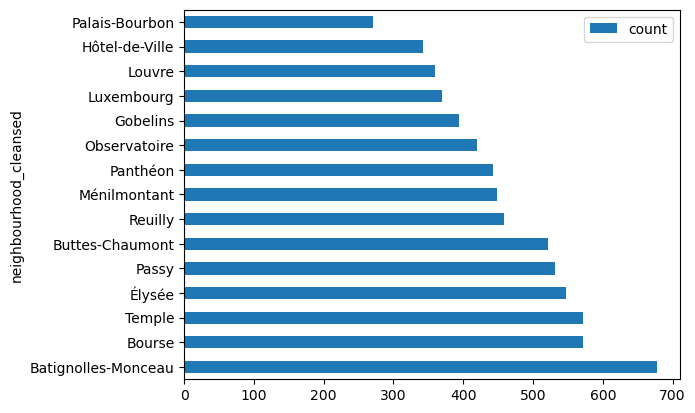

,count
neighbourhood_cleansed,
Batignolles-Monceau,677
Bourse,572
Temple,571
Élysée,547
Passy,531
Buttes-Chaumont,521
Reuilly,459
Ménilmontant,449
Panthéon,443


In [311]:
print('Least Listing number of count')
paris_l_clean = paris_l_clean.groupby('neighbourhood_cleansed')[['neighbourhood_cleansed','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

paris_l_clean.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(paris_l_clean.tail(15))
##La plupart des localités répertoriées, 15 moins bon

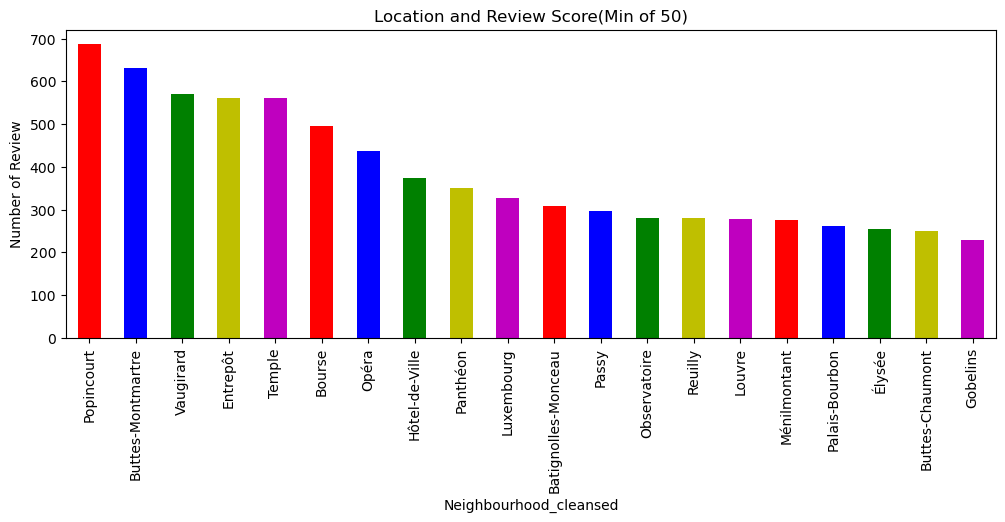

 Count of Review v/s neighbourhood_cleansed


,neighbourhood_cleansed
Popincourt,686
Buttes-Montmartre,631
Vaugirard,571
Entrepôt,562
Temple,561
Bourse,495
Opéra,436
Hôtel-de-Ville,373
Panthéon,351
Luxembourg,328


In [320]:
fig = plt.figure(figsize=(12,4))
review_50 = paris_l_clean[paris_l_clean['number_of_reviews']>=50]
paris_l_clean = review_50['neighbourhood_cleansed'].value_counts()
paris_l_clean.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood_cleansed')
plt.show()
print(' Count of Review v/s neighbourhood_cleansed')
pd.DataFrame(paris_l_clean)
##t

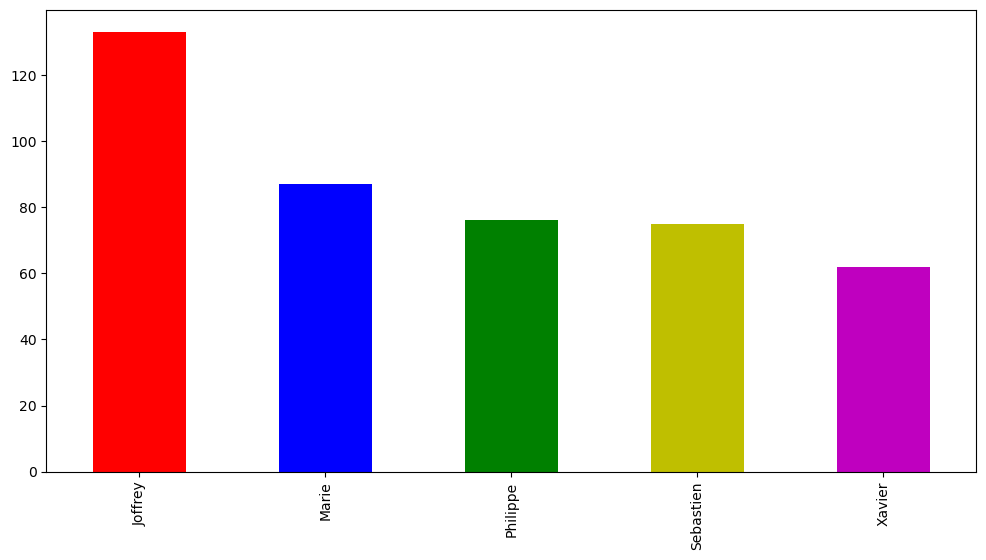

In [321]:
plt.figure(figsize=(12,6))
review_50.head(2)
paris_l_clean = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
##Le graphique ci-dessous montre le Top 5 des hôtes, Joffrey ait reçu plus de critiques pour être en tête du classement.

<AxesSubplot:xlabel='availability_365', ylabel='price'>

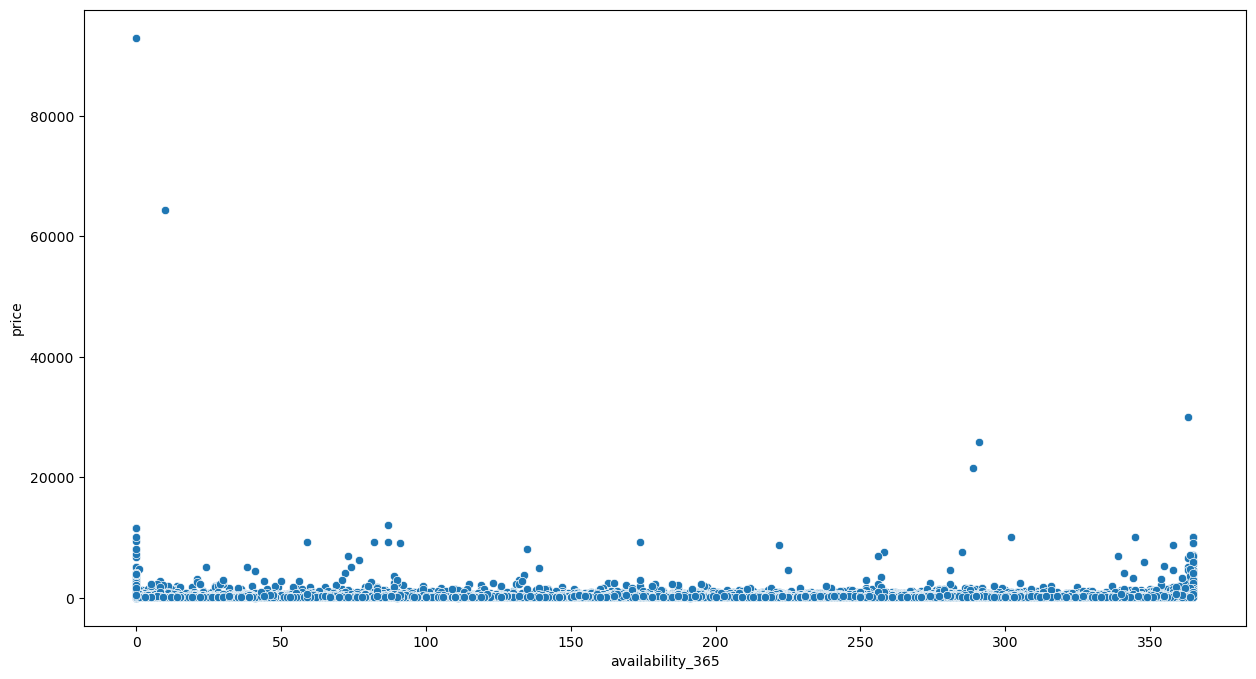

In [345]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=paris_l_clean['price'],x=paris_l_clean['availability_365'])
##Plot Price based on the Availability 365

In [346]:
paris_l_clean = review_50.groupby(['neighbourhood_cleansed','room_type']).mean()
paris_l_clean = paris_l_clean.drop(['id','calculated_host_listings_count','reviews_per_month'],axis=1)
pd.DataFrame(paris_l_clean).sort_values('neighbourhood_cleansed')
## Liste moyenne pour chaque groupe de quartier

host_id   latitude  longitude  \
neighbourhood_cleansed room_type                                             
Batignolles-Monceau    Entire home/apt  9.973909e+07  48.884521   2.307602   
                       Hotel room       2.493439e+08  48.881919   2.300418   
                       Private room     1.342908e+08  48.885284   2.309877   
                       Shared room      4.651164e+07  48.887060   2.314745   
Bourse                 Entire home/apt  1.241030e+08  48.867873   2.346971   
...                                              ...        ...        ...   
Vaugirard              Hotel room       1.981719e+08  48.842241   2.296630   
                       Shared room      2.411972e+08  48.842536   2.295908   
Élysée                 Hotel room       1.738440e+08  48.871298   2.310428   
                       Entire home/apt  1.517155e+08  48.873975   2.314376   
                       Private room     1.531380e+08  48.874968   2.316090   

                                        minimum_nights  number_of_reviews  \
neighbourhood_cleansed room_type                                            
Batignolles-Monceau    Entire home/apt       26.533333          95.146667   
                       Hotel room             1.133333         110.733333   
                       Private room           2.000000         139.242424   
                       Shared room            2.000000          92.000000   
Bourse                 Entire home/apt       11.602273         133.097727   
...                                                ...                ...   
Vaugirard              Hotel room            16.166667         162.041667   
                       Shared room            6.800000          93.400000   
Élysée                 Hotel room             1.000000         188.000000   
                       Entire home/apt       20.064815         113.513889   
                       Private room           2.424242         159.181818   

                                        review_scores_rating  availability_365  
neighbourhood_cleansed room_type                                                
Batignolles-Monceau    Entire home/apt              4.684800        120.124444  
                       Hotel room                   4.670000        229.933333  
                       Private room                 4.682727        107.666667  
                       Shared room                  4.655000         10.500000  
Bourse                 Entire home/apt              4.642091        161.834091  
...                                                      ...               ...  
Vaugirard              Hotel room                   4.702083        195.500000  
                       Shared room                  4.782000        232.600000  
Élysée                 Hotel room                   4.746667        192.666667  
                       Entire home/apt              4.627222        172.009259  
                       Private room                 4.809091        131.272727  

[72 rows x 7 columns]